**Autor:** Andrej Gajdoš  <br> 
_[Ústav matematických vied](https://www.upjs.sk/prirodovedecka-fakulta/ustav/umv/), [Prírodovedecká fakulta](https://www.upjs.sk/prirodovedecka-fakulta/), Univerzita Pavla Jozefa Šafárika v Košiciach,_ <br> 
email: [andrej.gajdos@upjs.sk](mailto:andrej.gajdos@upjs.sk)
*** 

**_Tento materiál vznikol za podpory grantu VVGS-2022-2412._**

***

**<font size=6 color=gold> NUM: Téma 1 - Úvod do numerických výpočtov </font>** 

--- 

<a id=table_of_contents></a>
##  Obsah 

* [Úvod](#uvod)


* [Numerika, symbolika, analytika](#analyticke_vs_numericke) 


* [Chyby numerických výpočtov](#chyby) 


* [Reprezentácia čísel v počítači](#repre) 


* [Podmienenosť úloh a stabilita algoritmov](#podm_stab) 


* [Algoritmická (výpočtová/časová) zložitosť](#zlozitost) 


* [Použité zdroje](#zdroje) 


**Pre návrat na obsah stlačte klávesu <font color=brown>Home</font>.** 

--- 

In [1]:
# nacitanie potrebnych balikov v Python-e 
import math 
import numpy as np 
import sympy as sym 
import scipy as sci 
from decimal import Decimal
from matplotlib import pyplot as plt

***
<a id=uvod></a>
 # <font color=brown> Úvod </font> 

--- 

#### <font color=blue> Príklad 0 (Nekomutatívne sčítanie?!) </font> 

Uvažujme nasledujúci konečný súčet (sčítanie od najväčšieho člena po najmenšieho): 

$$S(n)=1+\dfrac{1}{2}+\ldots+\dfrac{1}{n-1}+\dfrac{1}{n}$$ 

a taktiež súčet rovnakých členov ale v opačnom poradí (od najmenšieho člena po najväčšieho) 

$$s(n)=\dfrac{1}{n}+\dfrac{1}{n-1}+\ldots\dfrac{1}{2}+1.$$ 

Podľa "zvyčajných" pravidiel aritmetiky platí $S(n)=s(n)$. To sa však nemusí nevyhnutne stať, keď sú súčty vypočítané pomocou počítača. Ak vypočítame $s(n)$, $S(n)$ a následne vypočítame rozdiel $S(n)−s(n)$, získame hodnoty uvedené v tabuľke nižšie. Je zrejmé, že pre väčšie hodnoty $n$ sa tieto dva súčty líšia. Prvou otázkou je, prečo sa to deje? No sú tu i ďalšie otázky. Napr., za predpokladu, že oba súčty sú nesprávne resp. nepresné, je možné určiť, ktorý súčet je bližšie k presnému výsledku? 

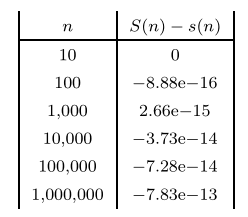 


In [19]:
def Sn(n):
    res = 0 
    for k in range(1,n+1): 
        res += 1/(k) 
    return(res)

def sn(n): 
    res = 0 
    for k in reversed(range(1,n+1)): 
        res += (1/k) 
    return(res)

In [22]:
# na prvy pohlad ziaden rozdiel
print(Sn(10)) 
print(sn(10))

2.9289682539682538
2.9289682539682538


In [20]:
# vsimnite si rozdiel v poslednej vypisanej cifre 
print(Sn(1000)) 
print(sn(1000))

4.499205338329423
4.499205338329425


In [23]:
# vsimnite si rozdiel v poslednej vypisanej cifre 
print(Sn(100000)) 
print(sn(100000))

7.485470860550343
7.485470860550341


In [25]:
# vsimnite si rozdiel v niekolkych poslednych vypisanych cifrach  
print(Sn(10000000)) 
print(sn(10000000))

16.695311365857272
16.695311365859965


In [27]:
# vypis rozdielov ako vyssie v tabulke 
[Sn(n)-sn(n) for n in [10,100,1000,10000,100000,1000000]]

[0.0,
 -8.881784197001252e-16,
 2.6645352591003757e-15,
 -3.730349362740526e-14,
 -7.283063041541027e-14,
 -7.833733661755105e-13]

--- 

**_Numerická matematika_** - zjednodušene vzaté, sa zaoberá procesmi, ktoré umožňujú riešiť matematické problémy pomocou štyroch aritmetických operácií (sčítanie, odčítanie, násobenie a delenie) s využitím počítača. Cieľom je vytvoriť efektívne algoritmy na riešenie najrôznejších matematických problémov. 

Formulácia úloh a spôsob ich riešenia je v dnešnej dobe závislý od skutočnosti, že pracujeme s počítačom. To si vyžaduje, aby sme zadali do počítača konečný počet číselných údajov a postup, tzv. _algoritmus_, prostredníctvom ktorého po konečnom počte krokov dostaneme na výstupe výsledok. 

V praxi prebieha celý postup obvykle podľa nasledujúceho diagramu: 

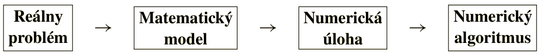

**_Reálny problém_** - ide o zadanú úlohu z najrôznejších odborov (fyzika, technika, chémia, biológia, medicína, humanitné odbory a pod.), ktorú chceme riešiť pomocou matematických prostriedkov.

**_Matematický model_** - skúmanú skutočnosť popíšeme pomocou vhodného vierohodného matematického modelu. Obvykle čím je model presnejší, tým je zložitejší. Takýmto modelom môže byť napr. systém lineárnych alebo nelineárnych rovníc, obyčajné diferenciálne rovnice, parciálne diferenciálne rovnice, integrálne rovnice, graf, tabuľka atď.

**_Numerická úloha_** - matematický model nemožno väčšinou riešiť priamo pomocou aritmetických operácií, je nutné vykonať jeho „digitalizáciu“. Tak dostaneme úlohu, ktorú je možné riešiť pomocou aritmetických operácií. Môže to byť napr. sústava lineárnych algebraických rovníc. Vstupom aj výstupom numerickej úlohy sú čísla.

**_Numerický algoritmus_** - numerickú úlohu možno riešiť rôznymi spôsobmi. Numerickým algoritmom rozumieme postup riešenia numerickej úlohy. Presný popis krokov (akcií, ktoré môže realizovať počítač), ktoré vedú k vyriešeniu numerickej úlohy, nazývame numerický algoritmus. Je to teda jednoznačný funkčný opis vzťahov medzi konečným počtom vstupných a konečným počtom výstupných hodnôt.

***
<a id=analyticke_vs_numericke></a>
 # <font color=brown> Numerika, symbolika, analytika </font> 

## Numerické výpočty vs symbolické výpočty

**_Numerické výpočty_** - zahrňujú priamo čísla; ide o manipuláciu s číslami za účelom výsledku v podobe numerickej (číselnej) hodnoty. 

**_Symbolické výpočty_** - symboly reprezentujú čísla; jedná sa o manipuláciu so symbolmi podľa matematických pravidiel za účelom výsledku v symbolickom tvare. 

--- 

#### <font color=blue> Príklad 1 (Numerický vs symbolický výpočet) </font> 

Numerický: $$\dfrac{(17.36)^2-1}{17.36+1}=16.36$$ 

Symbolický: $$\dfrac{x^2-1}{x+1}=x-1$$



In [4]:
# numericky vypocet 
print(((17.36)**2 - 1) / (17.36 + 1)) 

16.36


In [5]:
# symbolicky vypocet 
x = sym.Symbol('x') 
sym.cancel((x**2 - 1) / (x + 1))

x - 1

--- 

<font color=orange> Vymyslite vlastný príklad na numerický a symbolický výpočet (môžete využiť Python). </font> 

## Analytické riešenie vs numerické riešenie

Každý študent strednej školy pozná vzorec pre výpočet koreňov kvadratickej rovnice. Väčšina maturantov by si mohla (krátko po maturite) spomenúť na postup riešenia kubickej rovnice. Niektorí si možno spomenú na postup riešenia rovnice štvrtého stupňa a na postup riešenia reciprokých (recipročných) rovníc do stupňa 8 resp. 9. Ako ale vyzerá postup riešenia rovníc stupňa päť a viac? Takýto explicitný postup (vzorec) neexistuje. Nie preto, že nebol objavený, ale preto, že bolo dokázané, že existovat nemôže. To však nič nemení na situácii, že nájsť korene algebraických rovnic stupňa 5 a viac niekdy potrebujeme. Príkladom môže byť situácia, kedy potrebujeme určiť tzv. vlastné čísla matice. 

Zrejme poznáte pojmy určitý a neurčitý integrál. Pri výpočte $\displaystyle\int_{0}^{\pi/2}\cos x\,\mathrm{d}x$ najskôr nájdeme primitívnu funkciu k funkcii kosínus, dosadíme do nej hornú a dolnú hranicu, vzájomne odčítame a tento rozdiel prehlásime za výsledok. K niektorým funkciám však primitívne funkcie neexistujú. Takým príkladom je funkcia $f(x)=e^{-x^2}$, pričom ide o jednu zo základných funkcií používaných v teórii pravdepodobnosti, kde výpočet určitého integrálu z tejto funkcie umožňuje nájsť požadované pravdepodobnosti. V tomto prípade však nie je možné určiť hodnotu integrálu pomocou primitívnej funkcie. 

V lineárnej algebre sa častokrát využíva na riešenie sústav lineárnych rovníc Gaussova eliminačná metóda alebo Cramerovo pravidlo - najčastejšie však pre sústavy troch rovníc s troma neznámymi. Je ale možné aplikovať uvedené prístupy aj na sústavy sto (tisíc) rovníc so sto (tisíc) premennými, pričom ich koeficienty sa môžu vzájomne rádovo líšiť? 

Postupy riešenia matematických problémov, s ktorými ste sa stretli najmä v kurzoch matematickej analýzy alebo (lineárnej) algebry nazývame **_analytické_**. Niekedy sa však ukazuje ako vhodný, dokonca nevyhnutný iný prístup riešenia problému, tzv. **_numerický_**. Keď si napríklad vezmeme definíciu integrálu vrátane geometrickej interpretácie určitého integrálu, tak môžeme miesto hľadania primitívnej funkcie k funkcii $f(x)=e^{-x^2}$ skúsiť približne určiť obsah plochy medzi grafom funkcie a osou $x$ na danom intervale. Zrejme ho neurčíme úplne presne ale to mnohokrát ani nie je nevyhnutné. Podobne je to pri spomínaných rovniciach stupňa päť a viac. Tu si môžeme napr. uvedomiť, že hľadať ich riešenia znamená hľadať body, v ktorých príslušné polynómy nadobúdajú nulovú hodnotu. To je možné realizovať niekoľkými spôsobmi - napr. vykresliť si zodpovedajúci graf a hľadané body odhadnúť s istou toleranciou (presnosťou).  

**_Analytické riešenie_** (alebo aj symbolické) - ide o exaktnú numerickú alebo symbolickú reprezentáciu riešenia; používajú sa špeciálne znaky (označenia) ako napr. $\pi$, $e$ či $\mathrm{tan}(83)$ alebo zlomky ... 

**_Numerické riešenie_** - jedná sa o výpočtovú reprezentáciu riešenia tzn. výhradne numerický tvar. 

--- 

#### <font color=blue> Príklad 2 (Analytický/symbolický vs numerický tvar) </font> 

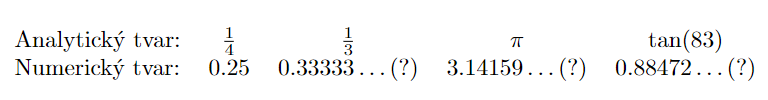 


In [2]:
# analyticky (symbolicky) tvar 
a_sym = sym.Rational(1, 4)
print(a_sym) 
b_sym = sym.Rational(1, 3)
print(b_sym) 
c_sym = sym.pi 
print(c_sym) 
d_sym = sym.tan(83) 
print(d_sym)

1/4
1/3
pi
tan(83)


In [7]:
# numericky tvar 
a_num = 0.25 
print(a_num)
b_num = 1/3 
print(b_num) 
c_num = math.pi 
print(c_num)
d_num = math.tan(83) 
print(d_num)

0.25
0.3333333333333333
3.141592653589793
3.880596310384246


--- 

<font color=orange> Vymyslite vlastný príklad na numerický a anyltický tvar zápisu (môžete využiť Python). </font> 

## Numerický výpočet a aproximácia

**_Numerická aproximácia_** - potrebná kvôli konkrétnym krokom pri numerických kalkuláciách. Celkový proces je **_numerický výpočet_**.

--- 

#### <font color=blue> Príklad 3  </font> 

Symbolický výpočet - numerické riešenie: 

$$\frac{1}{2}+\frac{1}{3}+\frac{1}{4}-1=\frac{1}{12}=0.083333333\ldots$$

Numerický výpočet - numerická aproximácia: 

$$0.500+0.333+0.250-1.000=0.083$$ 

In [8]:
# symbolicky vypocet - numericke riesenie 
r1 = sym.Rational(1, 2) + sym.Rational(1, 3) + sym.Rational(1, 4) - 1 
print(r1) 
print(r1.evalf())
print(r1.evalf(2))

1/12
0.0833333333333333
0.083


In [9]:
# numericky vypocet - numericka aproximacia 
r2 = 0.500 + 0.333 + 0.250 - 1.000 
print(r2) 
print(round(r2,3))

r3 = Decimal('0.500') + Decimal('0.333') + Decimal('0.250') - Decimal('1.000') 
print(r3) 

0.08299999999999996
0.083
0.083


--- 

## Numerický, numerická, numerické ... 

**_Numerická matematika_** - obor veľmi starý (napr. aproximácia čísla $\pi$) ale i veľmi mladý (súvisí s príchodom počítačov). Jej úlohou je previesť matematický problém (napr. aproximácia čísla $\pi$) na problém numerický. 

**_Metóda_** - všeobecný (matematický) koncept popisujúci proces nájdenia riešenia. 

**_Numerická metóda_** - postup riešenia numerického problému (úlohy). Napr. ["metóda vyčerpania"](https://www.pbs.org/wgbh/nova/archimedes/pi.html) (zhusťovacia/exhausivna metóda) pre určenie hodnoty čísla $\pi$ ([applet](https://www.geogebra.org/m/XV5ZE2PA#material/JDzH7wfz)): 

- nájdi dĺžku obvodu polygónu vpísaného do kruhu s polomerom $1/2$; 
- nájdi dĺžku obvodu polygónu opísaného kruhu s polomerom $1/2$; 
- hodnota čísla $\pi$ je medzi týmito dvoma číslami. 

**_Algoritmus_** - detailný popis vykonania metódy. 

**_Algoritmus numerickej metódy_** - presný popis krokov realizujúci numerickú metódu. Je možné ho vyjadriť ako postupnosť akcií/krokov (realizovateľných na počítači), ktoré k danému (presne špecifikovanému konečnému) súboru vstupných čísel jednoznačne priradia odpovedajúci (presne špecifikovaný konečný) súbor výstupných čísel. 

- v prípade vyššie uvedenej metódy vyčerpania by to napr. znamenalo doplnenie detailov - tzn. ako presne nájsť obvod vpísaného a opísaného polygónu atď. 

**_Implementácia_** - voľba vhodného algoritmu, dátovej štruktúry, počítača a programovacieho jazyka. 

<ins> Dôležité otázky: </ins> 

* Je metóda dobrá? 

* Je algoritmus robustný? 

* Je implementácia rýchla? 

**_Numerická analýza_** - štúdium numerických metód. 

- Ciele numerickej analýzy: 
    - **_Aproximácia_** - našlo sa približné riešenie; ako ďaleko je od skutočnosti (ako presne)? 
    - **_Eficiencia (účinnosť)_** - ako rýchlo (výpočtový čas) a lacno (pamäť) vieme nájsť riešenie? 
    - **_Stabilita_** - je riešenie citlivé na malé zmeny parametrov charakterizujúcich daný problém?
    - **_Chyba_** - aká je úloha konečnej presnosti našich počítačov?


- Numerické metódy zlepšujú vedecké simulácie. 

**Niekoľko katastrof zapríčinených zlými numerickými výpočtami** (Douglas Arnold): 

- Vojna v Perzskom zálive, Dharan, Saudská Arábia, 25. Februára,
1991 - 28 mŕtvych, zlyhanie taktického mobilného raketového
systému Patriot bolo nakoniec zapríčinené nesprávnym počítaním s
chybou zaokrúhľovania.

- Výbuch rakety Ariane 5 hneď po štarte jej prvého vzletu vo
Francúzskej Guiane, 4. Júna, 1996, bol dôsledkom jednoduchého
pretečenia (overflow - výsledok aritmetickej operácie sa nedá
vyjadriť v danom číselnom formáte). 

- Potopenie pobrežnej plošiny Sleipner A v Gandsfjordene neďaleko
Stavangeru v Nórsku 23. augusta 1991 spôsobilo stratu takmer
jednej miliardy dolárov. Zistilo sa, že je výsledkom nepresnej
analýzy konečných prvkov. 


--- 

#### <font color=blue> Príklad 4  </font> 

Ako **príklad "problému zo života"** uvažujme **predpoveď počasia**. Pohyb vzduchu v atmosfére dokážeme aspoň približne popísať pomocou sústav parciálnych diferenciálnych rovníc a vhodných doplňujúcich podmienok (t.j. matematický model). Metódami numerickej matematiky dokážeme tieto rovnice približne riešiť. Potrebné vstupné dáta sa získavajú pomocou družíc a pozemných meteorologických staníc. Výsledky numerických výpočtov spracované do animovaných meteorologických máp potom sledujeme napr. v televíznych predpovediach počasia. 
Pri riešení reálnych problémov takmer nikdy nezískame presné riešenie, musíme sa uspokojiť "len" s približným riešením, ktoré je zaťažené chybami (nepresnosťami). Našim cieľom je organizovať výpočet tak, aby celková chyba bola čo nejmenšia. 
Predovšetkým sa musíme vyvarovať hrubých ľudských chýb, ktoré vyplývajú z nepochopenia problému a z nepozornosti či nedbanlivosti človeka pri jeho riešení. 

---

<font color=orange> Uveďte jeden konkrétny príklad, na ktorom ilustrujete tieto pojmy: metóda, algoritmus, implementácia.  </font>

***
<a id=chyby></a>
 # <font color=brown> Chyby numerických výpočtov </font>

V skutočnosti by sme preformulovaním latinského výroku *errare humanum est* (mýliť sa je ľudské) mohli povedať, že pri numerických výpočtoch je dopúšťanie sa chýb dokonca nevyhnutné. Ako sme v úvode naznačili, používanie počítača na reprezentáciu reálnych čísel prináša chyby (nepresnosti).**Dôležité preto nie je usilovať sa o odstraňovanie chýb, ale mať možnosť kontrolovať ich účinok.** Vo všeobecnosti môžeme identifikovať niekoľko úrovní resp. druhov chýb, ktoré sa vyskytujú počas aproximácie a riešenia určitého (napr. fyzikálneho) problému (pozri nasledujúci obrázok). 

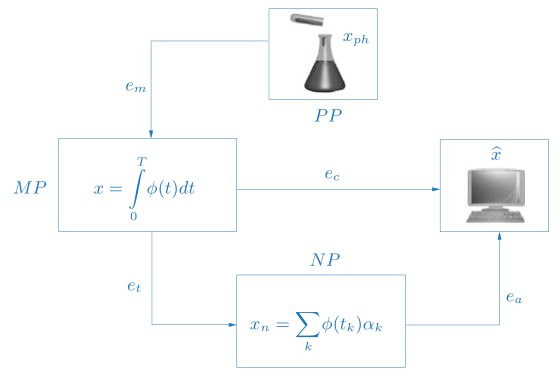 

Na najvyššej úrovni stojí chyba (na obrázku označené ako $e_m$), ku ktorej dochádza pri nútení fyzikálnej reality (PP znamená fyzikálny problém a $x_{ph}$ znamená jeho riešenie) riadiť sa nejakým matematickým modelom (MP, ktorého riešením je $x$). Takéto chyby obmedzia použiteľnosť matematického modelu na určité situácie a sú mimo kontroly vedeckých výpočtov. <br/> 
Matematický model (či už vyjadrený integrálom ako v príklade na obrázku, algebraickou alebo diferenciálnou rovnicou, lineárnym či nelineárnym systémom a pod.) nie je vo všeobecnosti riešiteľný v explicitnej forme (analyticky). Jeho vyriešenie  počítačovými algoritmami bude určite zahŕňať zavedenie a šírenie prinajmenšom _zaokrúhľovacích chýb_ (na obrázku označené ako $e_a$). <br/>
Na druhej strane je často potrebné uvažovať i ďalšie chyby, pretože akúkoľvek procedúru matematického modelu zahŕňajúcu  nekonečnú postupnosť aritmetických operácií nemôže počítač v skutočnosti vykonať, iba ak približne. Napríklad výpočet súčtu nekonečného radu sa nevyhnutne vykoná približným spôsobom, t.j. "rozumným" zanedbaním všetkých ostatných členov počnúc konkrétnym členom. <br/> 
Preto je potrebné uvažovať tzv. numerickú úlohu NP, ktorej riešenie $x_n$ sa líši od $x$ o chybu $e_t$ (_truncation error_), pričom ide o _chybu numerickej metódy_ resp. _chybu aproximácie_ (tu konkrétne ide o chybu vzniknutú tzv. _diskretizáciou_, t.j. nahradenie integrálu ("spojitého objektu") konečnou sumou ("diskrétnym objektom" resp. aproximáciou)). Takéto chyby sa nevyskytujú iba v matematických modeloch, ktoré sú už prirodzene formulované v konečnej dimenzii  (napríklad pri riešení lineárneho systému). Súčet chýb $e_a$, a $e_t$ tvorí výpočtovú chybu $e_c$, teda veličinu, ktorá nás zaujíma. 

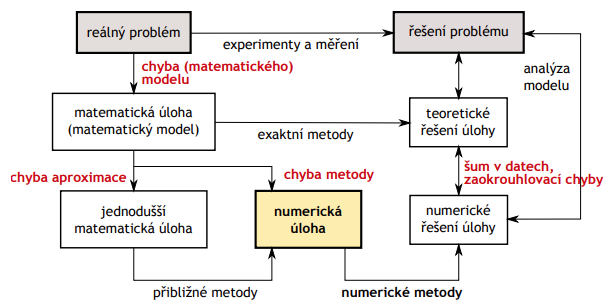 
$$\text{Zdroj: https://zolotarev.fd.cvut.cz/static/mag/mag-2014-08-handouts.pdf}.$$

**_Chyba matematického modelu_** - pri vytváraní matematického modelu reálneho problému uskutočnujeme vždy isté zjednodušenia. Rozdiel medzi riešením zjednodušeného problému a riešením problému reálneho nazývame chybou matematického modelu. Do tejto kategórie chýb radíme tiež **_chyby vo vstupných údajoch_** (napr. chyby meraní). 

--- 

#### <font color=blue> Príklad 5  </font> 

Máme určiť povrch zemského plášťa. Na výpočet použijeme vzorec $S=4\pi r^2$ pre povrch gule s polomerom $r$. Chyba modelu spočíva v predpoklade, že Zem je (ideálna) guľa. 

---

**_Chyba numerickej metódy_** -  pokiaľ k riešeniu (numerickej) úlohy použijeme numerickú metódu, ktorá nám neposkytne presné (teoretické/analytické) riešenie danej úlohy, tak chybu, ktorej sa dopustíme, nazývame chybou numerickej metódy resp. **_aproximačná chyba_** (_truncation error_ - napr. zanedbanie všetkých členov nekonečného radu od určitého člena). Dôležitou súčasťou návrhu numerickej metódy je **odhad chyby numerickej metódy**. 

--- 

#### <font color=blue> Príklad 6  </font> 

Máme určiť hodnotu funkcie $\sin x$ v bode $x=1$, sčítaním konečného počtu členov Taylorovho radu 

$$\sin x=x-\dfrac{x^3}{3!}+\dfrac{x^5}{5!}-\dfrac{x^7}{7!}+\dfrac{x^9}{9!}-\ldots+(-1)^n\dfrac{x^{2n+1}}{(2n+1)!}+\ldots$$

pre $x=1$. Je známe (premyslite si!), že sčítaním prvých troch členov radu sa dopustíme chyby veľkosti nanajvýš $\dfrac{1}{7!}$ a vo všeobecnosti sčítaním prvých $n$ členov sa dopustíme chyby nanajvýš $\dfrac{1}{(2n+1)!}$. Ide o tzv. diskretizačnú chybu, keďže pri aproximácii zanedbávame určitý (nekonečný) počet členov Taylorovho radu. 


In [6]:
# zobrazenie cez Sympy 
from IPython.display import display, Latex # lepsie formatovanie matematickeho textu pri vypise
sym.init_printing() # lepsie formatovanie matematickeho textu pri vypise 

x = sym.Symbol('x')
taylor_sin = lambda N=11: sym.series(sym.sin(x),x,n=N);
display(Latex('$\sin(x) ={}$'.format(sym.latex(taylor_sin())))) 

<IPython.core.display.Latex object>

--- 

**_Zaokrúhľovacie chyby_** - pri práci s počítačom môžeme k reprezentácii čísel použiť len konečný počet cifier. Pracujeme preto s približnými hodnotami čísel, ktoré dostaneme zaokrúhlením presných hodnôt. Zaokrúhľovacie chyby vznikajú už pri vkladaní dát do počítača, dalšie potom vznikajú pri číselných výpočtoch. Pri nesprávne prevedenom výpočte môže dôjsť v dôsledku nahromadenia zaokrúhľovacích chýb k úplnému znehodnoteniu výsledku (viď Príklad 22). 

--- 

#### <font color=blue> Príklad 7  </font> 

Číslo $\pi$ nie je možné vložiť do počítača úplne presne. Taktiež výsledok operácie, pri ktorej vydelíme číslo $2$ číslom $3$, nezobrazíme v štandardnom počítači pracujúcom s binárnymi číslami presne. 


In [6]:
print(math.pi) # cislo pi ulozene numericky 
pi = sym.pi # cislo pi ulozene symbolicky 
print(pi) # symbolicky vypis cisla pi 
print(pi.evalf(5)) # numericka reprezentacia cisla pi na 4 destinne miesta 
print(pi.evalf(10)) # numericka reprezentacia cisla pi na 9 destinnych miest  
print(pi.evalf(20)) 
print(pi.evalf(40)) 
print('')
print('*********************************************') 
print('') 
print(2/3) # podiel 2/3 numericky 
podiel = sym.Rational(2,3) # podiel 2/3 symbolicky (ako zlomok resp. racionalne cislo)
print(podiel) # symbolicky vypis podielu (zlomku) 
print(podiel.evalf(5)) # numericka reprezentacia podielu 2/3 na 4 desatinne miesta 
print(podiel.evalf(10)) # numericka reprezentacia podielu 2/3 na 9 desatinnych miest 
print(podiel.evalf(20)) 
print(podiel.evalf(40)) 

3.141592653589793
pi
3.1416
3.141592654
3.1415926535897932385
3.141592653589793238462643383279502884197

*********************************************

0.6666666666666666
2/3
0.66667
0.6666666667
0.66666666666666666667
0.6666666666666666666666666666666666666667


--- 

---

#### Poznámka 1 

Je potrebné mať na pamäti, že pri riešení reálneho problému sa obvykle vyskytujú všetky chyby súčasne.  

--- 

--- 

#### <font color=blue> Príklad 8  </font> 

Majme $f\in C^2\langle a,b \rangle$. Podľa Vety o strednej hodnote pre integrály platí 

$$f'(x)=\dfrac{f(x+h)-f(x)}{h}+\dfrac{1}{h}\displaystyle\int_{x}^{x+h}f''(t)(x+h-t)\,\mathrm{d}t$$ 

a 

$$\left|\dfrac{1}{h}\displaystyle\int_{x}^{x+h}f''(t)(x+h-t)\,\mathrm{d}t\right|\le ch.$$

Preto platí $f'(x)\approx \dfrac{f(x+h)-f(x)}{h}$ a chyba je rádu $\mathcal{O}(h)$. Ide o chybu metódy (anglicky *method error* alebo tiež *truncation error*). 

Ďalej položme $f(x)=\ln x$ a budeme počítať približné hodnoty (aproximácie) $f'(3)\approx\dfrac{f(3+h)-f(3)}{h}$ pre malé $h$ (pomocou kalkulačky s 11 číslicami). Dostaneme tieto výsledky: 

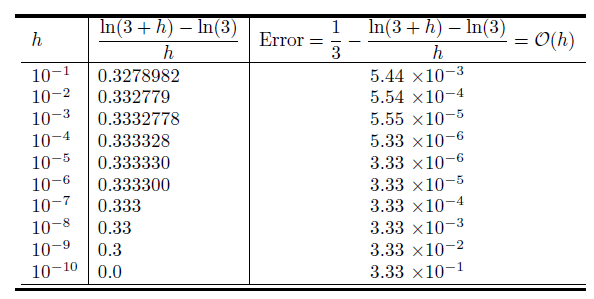 
$$\text{Zdroj: Ackleh (2009).}$$

Môžeme si všimnúť, že v prvých štyroch krokoch chyba klesá s faktorom $10$ (desaťnásobne) pričom $h$ sa zmenšuje tiež desaťnásobne - tzn., že chyba metódy dominuje. Avšak od $h=0.00001$ chyba rastie - tzn., že dominuje zaokrúhľovacia chyba (kvôli konečnému počtu číslic). 

---

---

#### Poznámka 2 

Existujú **dve možnosti ako zredukovať zaokrúhľovacie chyby**: 

1. Chyba metódy sa dá zredukovať voľbou presnejšej metódy. Uvažujme pre Príklad 8 vzťah 
<br/>
<br/>
$$f'(x)=\dfrac{f(x+h)-f(x-h)}{2h}+\text{ {chyba} }, \qquad \text{ kde } \text{ {chyba} je } \mathcal{O}(h^2).$$
<br/>

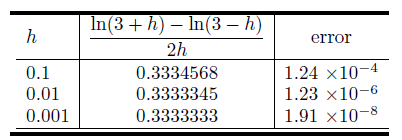  
$$\text{Zdroj: Ackleh (2009).}$$
<br/>
Chyba klesá stonásobne, pričom $h$ sa zmenšuje desaťnásobne. 

2. Chybu zaokrúhľovania možno znížiť použitím viacerých číslic presnosti, ako je napríklad aritmetika s dvojitou presnosťou (alebo s viacnásobnou presnosťou).

--- 

## Absolútna a relatívna chyba

Vo výpočtoch sme často nútení nahradiť presné číslo $x$ približným číslom $\tilde{x}$. Číslo $\tilde{x}$ potom nazývame **_aproximáciou_** čísla $x$. Rozdiel $\Delta x=\tilde{x}-x$ nazývame **_absolútnou chybou_** aproximácie $\tilde{x}$ a číslo $\dfrac{\Delta x}{x}=\dfrac{\tilde{x}-x}{x}$, $x\neq0$ nazývame **_relatívnou chybou_** aproximácie $\tilde{x}$. Pre $|\Delta x|\le\varepsilon$ sa používa tiež symbolický zápis $\tilde{x}=x\pm\varepsilon$ a myslí sa tým $x-\varepsilon\le\tilde{x}\le x+\varepsilon$. Podobne sa pre $|\Delta x/x|\le\delta$ používa zápis $\tilde{x}=x(1\pm\delta)$. **Absolútna hodnota relatívnej chyby sa často uvádza v percentách.** 

Teraz **odhadneme chybu, ktorej sa dopustíme pri výpočte hodnoty $f(x_1,x_2,\ldots,x_n)$ funkcie $f$, keď presné hodnoty $x_i$ nahradíme približnými hodnotami $\tilde{x}_i=x_i+\Delta x_i$**. Pomocou Taylorovho rozvoja $f\left(\tilde{\mathbf{x}}\right)$ v okolí bodu $\mathbf{x}=(x_1,x_2,\ldots x_n)'$, pričom $\tilde{\mathbf{x}}=\left(\tilde{x}_1,\tilde{x}_2,\ldots,\tilde{x}_n\right)'$, dostaneme 

$$f\left(\tilde{\mathbf{x}}\right)=f(\mathbf{x})+\displaystyle\sum\limits_{i=1}^{n}\Delta x_i\dfrac{\partial f(\mathbf{x})}{\partial x_i}+\dfrac{1}{2}\displaystyle\sum\limits_{i,j=1}^{n}\Delta x_i\Delta x_j\dfrac{\partial^2f(\mathbf{x})}{\partial x_i\partial x_j}+\ldots$$ 

Ak považujeme súčiny chýb $\Delta x_i\Delta x_j$ za malé (zanedbateľné), potom pre absolútnu chybu máme 

\begin{equation*} \label{eq:aproxFuncAbsErr} \tag{1}
\left|\Delta f(\mathbf{x})\right|:=\left|f\left(\tilde{\mathbf{x}}\right)-f(\mathbf{x})\right|\doteq\left|\displaystyle\sum\limits_{i=1}^{n}\dfrac{\partial f(\mathbf{x})}{\partial x_i}\Delta x_i\right|\le\displaystyle\sum\limits_{i=1}^{n}\left|\dfrac{\partial f(\mathbf{x})}{\partial x_i}\right|\cdot\left|\Delta x_i\right|
\end{equation*}

a pre chybu relatívnu 

\begin{equation*} \label{eq:aproxFuncRelErr} \tag{2}
\left|\dfrac{\Delta f(\mathbf{x})}{f(\mathbf{x})}\right|\doteq\left|\displaystyle\sum\limits_{i=1}^{n}\dfrac{x_i}{f(\mathbf{x})}\dfrac{\partial f(\mathbf{x})}{\partial x_i}\dfrac{\Delta x_i}{x_i}\right|\le\displaystyle\sum\limits_{i=1}^{n}\left|\dfrac{x_i}{f(\mathbf{x})}\dfrac{\partial f(\mathbf{x})}{\partial x_i}\right|\cdot\left|\dfrac{\Delta x_i}{x_i}\right|
\end{equation*}

Pri odhadoch v praxi sa hodnota funkcie $f$ a hodnoty jej derivácií $\dfrac{\partial f}{\partial x_i}$ na pravých stranách približných nerovností \eqref{eq:aproxFuncAbsErr} a \eqref{eq:aproxFuncRelErr} počítajú v bode $\tilde{\mathbf{x}}$. 

## Chyby základných aritmetických operácií 

Ak zvolíme $f(x,y)=x\pm y$, tak dostanenme pre absolútnu a relatívnu chybu súčtu i rozdielu nasledovné: 

\begin{equation*} \label{eq:addSubAbsRelErr} \tag{3}
\Delta(x\pm y)\doteq\Delta x \pm \Delta y, \qquad\qquad \dfrac{\Delta(x\pm y)}{x\pm y}\doteq\dfrac{x}{x\pm y}\dfrac{\Delta x}{x}\pm\dfrac{y}{x\pm y}\dfrac{\Delta y}{y}.
\end{equation*}

Pre vyjadrenie chyby súčinu volíme $f(x,y)=xy$ a získame 

\begin{equation*} \label{eq:prodAbsRelErr} \tag{4} 
\Delta(xy)\doteq y\Delta x + x\Delta y, \qquad\qquad \dfrac{\Delta(xy)}{xy}\doteq\dfrac{\Delta x}{x}+\dfrac{\Delta y}{y}. 
\end{equation*} 

Nakoniec pre chybu podielu dostaneme voľbou $f(x,y)=x/y$ 

\begin{equation*} \label{eq:divAbsRelErr} \tag{5} 
\Delta\left(\dfrac{x}{y}\right)\doteq\dfrac{1}{y}\Delta x - \dfrac{x}{y^2}\Delta y, \qquad\qquad \dfrac{\Delta(x/y)}{x/y}\doteq\dfrac{\Delta x}{x}-\dfrac{\Delta y}{y}.  
\end{equation*} 

Všimnime si, že relatívna chyba súčtu resp. rozdielu môže byť výrazne väčšia ako relatívna chyba operandov násobenia/delenia v prípade, keď je $|x\pm y|$ podstatne menšie než $|x|$ alebo $|y|$. Pri delení malým číslom je (vďaka druhej mocnine $y$ v menovateli) významná chyba absolútna. 

--- 

#### <font color=blue> Príklad 9 </font> 
 
Predpokladajme, že $x=1.5$, $y=3.4$, pričom $x$ vieme určiť s absolútnou chybou $0.05$ a $y$ s absolútnou chybou $0.04$, tzn. $\left|\Delta x\right| \le 0.05$ a $\left|\Delta y\right|\le0.04$. Inými slovami, ak $\tilde{x}$ je aproximácia čísla $x$, tak $x-0.05\le\tilde{x}\le x+0.05$. Podobne $y-0.04\le\tilde{y}\le y+0.04$. 
Pokúsime sa nájsť hranice pre šírenie chyby pri sčítaní dvoch čísel $x+y$. 

Zrejme maximálne možné hodnoty sú $x=1.5+0.05=1.55$ a $y=3.4+0.04=3.44$ (berieme $\Delta x = 0.05$ a $\Delta y = 0.04$). Preto maximálna možná hodnota pre súčet je $x+y=1.55+3.44=4.99$. 

Podobne minimálne možné hodnoty sú $x=1.5-0.05=1.45$ a $y=3.4-0.04=3.36$ (berieme $\Delta x = 0.05$ a $\Delta y = 0.04$). Preto minimálna možná hodnota pre súčet je $x+y=1.45+3.36=4.81$. 

Spolu teda dostávame 

$$4.81\le x+y \le 4.99.$$

Podľa vzťahu (3) je absolútna chyba súčtu rovná hodnote $0.05+0.04=0.09$. Vzhľadom k (4) je relatívna chyba súčtu rovná hodnote $\dfrac{0.05+0.04}{1.5+3.4}\doteq0.0184$ t. j. zhruba $1.84\%$.  

---

## Platné dekadické cifry 

Nech $\tilde{x}$ je aproximácia čísla $x$, ktorú zapíšeme v mocninovom dekadickom rozvoji nasledovne ($e$ je celočíselný exponent)

$$\tilde{x}=\pm\left[d_1\cdot10^e+d_2\cdot10^{e-1}+\ldots+d_k\cdot10^{e+1-k}+d_{k+1}\cdot10^{e-k}+\ldots\right],\qquad d_1\neq0.$$ 

Hovoríme, že $k$-tá **_dekadická cifra_** $d_k$ aproximácie $\tilde{x}$ je **_platná_**, ak 

\begin{equation*} \label{eq:decadSigDig} \tag{6} 
\left|\tilde{x}-x\right|\le5\cdot10^{e-k}
\end{equation*} 

t. j. keď sa $\tilde{x}$ líši od $x$ nanajvýš o 5 jednotiek rádu prislúchajúcemu k nasledujúcej cifre. Pokiaľ \eqref{eq:decadSigDig} platí pre $k\le p$ ale pre $k=p+1$ už neplatí, vtedy hovoríme, že $\tilde{x}$ má $p$ **_platných cifier_**. Číslo $\tilde{x}=\pm d_1d_2d_3\ldots d_p\cdot10^e$, ktoré má všetkých $p$ cifier platných, je **_správne zaokrúhlenou hodnotou_** čísla $x$. 

Ďalšie doplňujúce informácie k platných cifrám, ktoré sú v súlade s uvedenou definíciou \eqref{eq:decadSigDig}, je možné nájsť napr. tu: [zdroj1](https://github.com/gajdosandrej/NUM_redukcia/blob/main/DoplnujuceMaterialy/PlatneCisliceWikipedie.pdf), [zdroj2](https://github.com/gajdosandrej/NUM_redukcia/blob/main/DoplnujuceMaterialy/significant-figures.pdf), [zdroj3](https://github.com/gajdosandrej/NUM_redukcia/blob/main/DoplnujuceMaterialy/SignificantDigits.pdf). Kľúčové je ale uvažovať tzv. [vedeckú notáciu čísel](https://cs.wikipedia.org/wiki/V%C4%9Bdeck%C3%BD_z%C3%A1pis_%C4%8D%C3%ADsel) (všetky číslice uvedené v tomto type zápisu sú automaticky platné, pričom predpokladáme, že prvá číslica je nenulová - podobne ako je to uvedené vyššie pri vzťahu \eqref{eq:decadSigDig}). 

## Platné desatinné miesta 

Hovoríme, že aproximácia $\tilde{x}$ čísla $x$ má $k$-te **_desatinné miesto platné_**, ak 

\begin{equation*} \label{eq:decimSigDig} \tag{7} 
\left|\tilde{x}-x\right|\le5\cdot10^{-k-1}
\end{equation*} 

t. j. keď sa $\tilde{x}$ líši od $x$ nanajvýš o 5 jednotiek rádu prislúchajúcemu k nasledujúcemu desatinnému miestu. Pokiaľ \eqref{eq:decimSigDig} platí pre $k\le p$ ale pre $k=p+1$ už neplatí, vtedy hovoríme, že $\tilde{x}$ má $p$ **_platných desatinných miest_**. V správne zaokrúhlenom čísle je teda každé desatinné miesto platné. 

Niekoľko príkladov je uvedených v nasledujúcej tabuľke: 

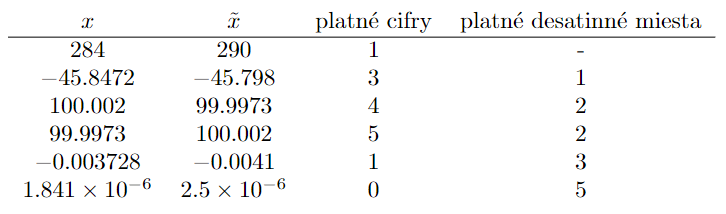 


<font color=orange> Závery z predchádzajúcej tabuľky overte v Python-e.  </font> 

**Pri odčítavaní dvoch blízkych čísel dochádza k strate platných cifier** - ilustruje to ďalší príklad. 

--- 

#### <font color=blue> Príklad 10 </font> 
 
Majme 

$$x=4.998949 \times 10^1, \quad \tilde{x}=4.999 \times 10^1, \quad |\Delta x|=5.10 \times 10^{-4}, \quad \left|\dfrac{\Delta x}{x}\right|\doteq 1.020 \times 10^{-5},$$

$$y=5.001848 \times 10^1, \quad \tilde{y}=5.002 \times 10^1, \quad |\Delta y|=1.52 \times 10^{-3}, \quad \left|\dfrac{\Delta y}{y}\right|\doteq 3.039 \times 10^{-5},$$

potom pre rozdiely $z=y-x$, $\tilde{z}=\tilde{y}-\tilde{x}$ dostávame 

$$z=2.899 \times 10^{-2}, \quad \tilde{z}=3 \times 10^{-2}, \quad |\Delta z|=1.01 \times 10^{-3}, \quad \left|\dfrac{\Delta z}{z}\right|\doteq 3.484 \times 10^{-2},$$

takže $\tilde{z}$ má len jednu platnú cifru, zatiaľ čo $\tilde{x}$, $\tilde{y}$ majú štyri platné cifry. 

---

--- 

#### <font color=blue> Príklad 11 </font> 
 
Nech $x=1.3262\pm 5 \times 10^{-5}$, $y=-6.5347 \pm 5 \times 10^{-5}$, $z=13.235 \pm 5 \times 10^{−4}$. 

Máme určiť aproximáciu funkčnej hodnoty $f=xy/z$, absolútnu i relatívnu chybu a počet platných cifier výsledku. 

Vypočítame $\tilde{f}=\tilde{x}\tilde{y}/\tilde{z}=-6.548031\ldots \times 10^{−1}$. Podľa (1) potom približne platí 

$$\left|\dfrac{\Delta f}{\tilde{f}}\right|\le\left[\left|\dfrac{\tilde{y}}{\tilde{z}}\Delta x\right|+\left|\dfrac{\tilde{x}}{\tilde{z}}\Delta y\right|+\left|\dfrac{\tilde{x}\tilde{y}}{\tilde{z}^2}\Delta z\right|\right]\left|\dfrac{\tilde{x}\tilde{y}}{\tilde{z}}\right|^{-1}=\left|\dfrac{\Delta x}{\tilde{x}}\right|+\left|\dfrac{\Delta y}{\tilde{y}}\right|+\left|\dfrac{\Delta z}{\tilde{z}}\right|\doteq8.31\times10^{-5}.$$

Odtiaľ $|\Delta f|\doteq8.31\times10^{-5}$, $|\tilde{f}|\doteq5.44\times10^{-5}<5\times10^{-1-3}$, takže (s troma platnými ciframi) $f=-0.6548\pm0.0001$. 

---

***
<a id=repre></a>
 # <font color=brown> Reprezentácia čísel v počítači </font>

Reálne čísla sú v počitačoch reprezentované v tzv. **_systéme čísel s pohyblivou rádovou čiarkou_** (v angličtine *floating point numbers*). Základná myšlienka je podobná *semilogaritmickému zápisu* (v angličtine *scientific notation*), v ktorom napr. číslo $245700$ píšeme ako $2.457 \times 10^5$ a číslo $0.0005768$ ako $5.768 \times 10^{−4}$. V tomto formáte sa desatinná čiarka "pohybuje" (v doslovnom preklade "pláva") v závislosti na dekadickom exponente. Formálne je možné systém $\mathbb{F}$ **_normalizovaných čísel pohyblivej rádovej čiarky_** charakterizovať štyrmi celými číslami: 

* $\beta$ - základ číselnej sústavy ($\beta\ge2$); 

* $p$ - presnosť ($p>1$); 

* $[L,U]$ - rozsah exponentu ($L<0<U$). 

Každé číslo $x\in\mathbb{F}$ má tvar 

$$x=\pm m\cdot\beta^e,\quad \text{ kde } \quad m=d_1+\dfrac{d_2}{\beta}+\dfrac{d_3}{\beta^2}+\ldots+\dfrac{d_p}{\beta^{p-1}}$$ 

je **_normalizovaná mantisa_**, a $d_i\in\{0,1,\ldots,\beta-1\}$, $i\in\{1,2,\ldots,p\}$ sú cifry mantisy, $p$ je počet cifier mantisy a $e\in\left[L,U\right]$ je celočíselný exponent. Normalizácia mantisy znamená, že pre $x\neq0$ je prvá cifra mantisy nenulová, t. j. platí $d_1\ge1$, takže $1\le m <\beta$. Pre $x=0$ je nulová mantisa aj exponent, tzn. $m=e=0$. 

Väčšina počítačov používa **_binárnu aritmetiku_**, kde $\beta=2$ (ide vlastne o prácu v pozičnej číselnej sústave so základom $2$, tzv. dvojková sústava). Pre stručnejší zápis binárnych čísel sa bežne používa _hexadecimálna sústava_ (šestnástková), kde $\beta=16$ (cifry $10$ až $15$ sa zapisujú pomocou písem $A,B,C,D,E,F$). Niekedy sa využíva tiež *oktálna (osmičková) sústava*, kde $\beta=8$. Výsledky výpočtov sa však zvyčajne zapisujú v bežnej - *dekadickej (desiatkovej) sústave*, t. j. pre $\beta=10$. 
Viac o najpoužívanejších pozičných číselných sústavách v informačných technológiách a o práci v nich sa môžete dočítať napr. [tu](https://nbviewer.org/github/gajdosandrej/MTIa/blob/main/MTIa/Tema4/MTIaTema4CiselneSustavy.ipynb?flush_cache=true) alebo tiež [tu](https://homel.vsb.cz/~hom50/INFORM/HWDDATA/HWDDATA.HTM). 

In [37]:
x = 0b1011 # '0b' znaci, ze cislo je zadavane v dvojkovej sustave
print('Hodnota binarneho cisla ' + str(1011) + ' v desiatkovej sustave : ',x) 
print('(1011)_2 = (1*2^0 + 1*2^1 + 0*2^2 + 1*2^3)_{10} = (11)_{10} = 11') 
print('')
x = 0o123 # '0o' znaci, ze cislo je zadavane v osmickovej sustave
print('Hodnota oktalneho cisla 123 v desiatkovej sustave : ',x) 
print('(123)_8 = (3*8^0 + 2*8^1 + 1*8^2)_{10} = (83)_{10} = 83') 
print('')
x = 4321 # standardne je cislo zadavane v desiatkovej sustave
print('Hodnota decimalneho cisla 4321 v desiatkovej sustave : ',x) 
print('(4321)_{10} = (1*10^0 + 2*10^1 + 3*10^2 + 4*10^3)_{10} = (4321)_{10} = 4321') 
print('')
x = 0x2B5 # '0x' znaci, ze cislo je zadavane v sestnastkovej sustave
print('Hodnota hexadecimalneho cisla 2B5 v desiatkovej sustave : ',x) 
print('(2B5)_{16} = (5*16^0 + 11*16^1 + 2*16^2)_{10} = (693)_{10}=693') 

Hodnota binarneho cisla 1011 v desiatkovej sustave :  11
(1011)_2 = (1*2^0 + 1*2^1 + 0*2^2 + 1*2^3)_{10} = (11)_{10} = 11

Hodnota oktalneho cisla 123 v desiatkovej sustave :  83
(123)_8 = (3*8^0 + 2*8^1 + 1*8^2)_{10} = (83)_{10} = 83

Hodnota decimalneho cisla 4321 v desiatkovej sustave :  4321
(4321)_{10} = (1*10^0 + 2*10^1 + 3*10^2 + 4*10^3)_{10} = (4321)_{10} = 4321

Hodnota hexadecimalneho cisla 2B5 v desiatkovej sustave :  693
(2B5)_{16} = (5*16^0 + 11*16^1 + 2*16^2)_{10} = (693)_{10}=693


In [40]:
# prevody z desiatkovej sustavy do inych sustav 
dec = 344
print('Hodnota cisla', dec, "v sustave")
print('binarnej: ' + bin(dec) + ';')
print('oktalnej: ' + oct(dec) + ';')
print('hexadecimalnej: ' + hex(dec) + '.')

Hodnota cisla 344 v sustave
binarnej: 0b101011000;
oktalnej: 0o530;
hexadecimalnej: 0x158.


<font color=orange> Pomocou Python-u vykonajte nasledovné konverzie: $(1001)_{2}=(?)_8$, $(100101)_{2}=(?)_{16}$, $(123)_8=(?)_2$, $(456)_8=(?)_{16}$, $(FACE)_{16}=(?)_2$, $(94AB)_{16}=(?)_{8}$.  </font> 

Množina $\mathbb{F}$ čísel pohyblivej rádovej čiarky je konečná, počet čísel v nej je $2(\beta - 1)\beta^{p-1}(U - L + 1) + 1$, lebo môžeme voliť dve znamienka (plus/mínus), $\beta-1$ možností je pre prvú cifru mantisy, $U-L+1$ je možných hodnôt exponentu a posledná jednotka odpovedá číslu nula. 

Najmenšie kladné číslo v $\mathbb{F}$ je číslo $UFL=\beta^L$ (z anglického *Under Flow Level*), ktoré má prvú cifru mantisy rovnú jednotke, zvyšné cifry sú nulové a exponent je najmenší možný. Najväčšie číslo v $\mathbb{F}$ je číslo $OFL=\left(\beta-\beta^{1-p}\right)\beta^U$ (z anglického *Over Flow Level*), ktoré má všetky cifry mantisy rovné $\beta-1$ a exponent najväčší možný. 

## Zaokrúľovanie 

Reálne čísla, ktoré sú presne zobraziteľné (reprezentovateľné) v systéme $\mathbb{F}$, sa nazývajú **_strojové čísla_**. Pokiaľ dané reálne číslo  $x\notin\mathbb{F}$, musíme ho aproximovať "blízkym" strojovým číslom, ktoré označíme $fl(x)$ (z anglického *floating*). Štandardný spôsob je **_zaokrúhľovanie_**: $fl(x)$ je strojové číslo (s konečnou presnosťou) najbližšie k $x$ (keď máme na výber z dvoch možností, potom vyberieme strojové číslo, ktoré má poslednú cifru párnu). Existujú i [ďalšie prístupy k zaokrúhľovaniu](https://sk.alegsaonline.com/art/84346), napr. v angličtine označované ako **_chopping_** - **_(s)krátenie_** (v binárnej reprezentácii strojového čísla "zahodíme" bity nasledujúce za 52. bitom reprezentujúcim mantisu) a **_rounding_** - **_zaokrúhlenie_** (v desiatkovej sústave sa čísla zvyčajne zaokrúhľujú nahor, ak je nasledujúca číslica 5 alebo vyššia, a inak sa zaokrúhľujú nadol. V binárnom systéme to zodpovedá zaokrúhleniu nahor, ak je bit 1.).  

---

#### Poznámka 3 

Vo všeobecnosti, ak sa počíta numerická aproximácia $\tilde{z}$ k veličine $z$, **relatívna chyba súvisí s počtom správnych (platných) číslic za desatinnou čiarkou** (resp. bodkou). Napríklad, ak $z = 0.0000123453$ a $\tilde{z} = 0.00001234543$, hovoríme, že $\tilde{z}$ je správne na $5$ *platných číslic*. Vyjadrením $z$ v tvare $0.123453 \times 10^{-4}$ a $\tilde{z}$ v tvare $0.123454 \times 10^{-4}$ vidíme, že ak zaokrúhlime $\tilde{z}$ na najbližšie číslo s piatimi číslicami v mantise, všetky tieto číslice sú správne, zatiaľ čo ak urobíme to isté so šiestimi číslicami, šiesta číslica nie je správna. Platné číslice sú logickejším spôsobom, ako hovoriť o presnosti pri výpočte s pohyblivou rádovou čiarkou, kde nás zaujíma relatívna chyba, a nie „počet číslic za desatinnou čiarkou“, ktorý môže mať iný význam. (Tu by sa dalo povedať, že $\tilde{z}$ je správne na 9 číslic za desatinnou čiarkou.) 

--- 

--- 

## Strojová presnosť 

Číslo $\varepsilon_m=\beta^{1-p}$ sa nazýva **_strojové epsilon_** alebo tiež **_strojová presnosť_** (anglicky _machine epsilon_ ozn. $\varepsilon_{mach}$). Význam čísla $\varepsilon_{mach}$ dokladuje niekoľko jeho charakteristických vlastností: 

a) v intervale $\left\langle\beta^e,\beta^{e+1}\right\rangle$ sú strojové čísla rozmiestnené rovnomerne s krokom $\varepsilon_{m}\beta^e$; 

b) najväčšia možná relatívna chyba, ktorá vznikne pri aproximácii reálneho čísla v systéme $\mathbb{F}$ pohyblivej rádovej čiarky, nepresiahne $\frac{1}{2}\varepsilon_m$, t.j. platí $\left|fl(x)-x\right|\le\frac{1}{2}\varepsilon_m|x|$; 

c) $\varepsilon_m$ je najväčšie z kladných čísel $\varepsilon$, pre ktoré platí $fl\left(1+\frac{1}{2}\varepsilon\right)=1$. 


Je vhodné uvedomiť si, že $\varepsilon_m\in\mathbb{F}$, len ak $1-p\ge L$. 

--- 

#### <font color=blue> Príklad 12 </font> 
 
Preskúmajme, aké čísla môžeme zobraziť v modelovom binárnom systéme $\mathbb{F}$, v ktorom mantisa má $p=4$ cifry, exponent $e$ je ohraničený zdola číslom $L=-3$ a zhora ohraničený číslom $U=2$, tzn. $-3\le e \le 2$. Umiestnenie kladných strojových čísel na číselnej osi je znázornené na obrázku nižšie: najmenšie z nich je $UFL=2^{-3}=1/8$; najväčšie je $OFL=\left(2-2^{-3}\right)\times2^2=8-1/2$. Všimnime si, že v každom binárnom intervale $2^e\le x\le2^{e+1}$, sú čísla rozložené rovnomerne s krokom $\varepsilon_m2^e$. Napr. medzi $1$ a $2$ t.j. pre $e=0$, je vzdialenosť dvoch susedných čísel rovná $\varepsilon_m=1/8$. Zadaný systém $\mathbb{F}$ obsahuje $48$ kladných čísel, $48$ záporných čísel a nulu, t. j. celkovo $97$ čísel. 

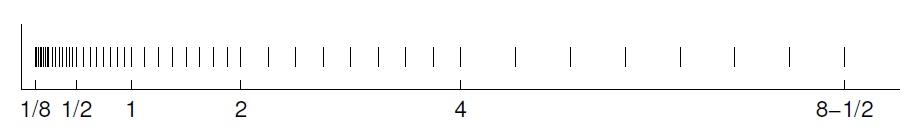 
$$\text{Zdroj: Čermák (2020).}$$

---

## Štandard IEEE

V počítačoch vyvinutých po roku 1985 sa reálne čísla zobrazujú prakticky výhradne podľa tzv. štandardu IEEE (*The Institute of Electrical and Electronics Engineers*; *Standard for Binary Floating Point Arithmetic*) a to spravidla v týchto presnostiach: 

a) **_Jednoduchá presnosť_** (anglicky *single precision*). Použijú sa $4$ bajty, t. j. $32$ bitov (viac napr. [tu](https://homel.vsb.cz/~hom50/INFORM/HWDDATA/HWDDATA.HTM)), z toho $23$ bitov pre mantisu, $8$ bitov pre exponent a $1$ bit pre znamienko mantisy. Keďže mantisa je normalizovaná, pre $x\neq0$ je $d_1=1$. Táto cifra sa neukladá, preto je počet cifier mantisy $p=24$. Rozsah exponentu je $-126\le e \le 127$. Zobraziť je možné dekadické čísla s absolútnou hodnotou v rozsahu 

$$UFL=2^{-126}\doteq1.2\times10^{-38} \qquad \text{ až } \qquad OFL=\left(2-2^{-23}\right)\times2^{127}\doteq3.4\times10^{38}$$ 

a nulu (má všetky bity nulové). Strojová presnosť $\varepsilon_m=2^{-23}\doteq1.2\times10^{-7}$. Hovoríme, že mantisa má zhruba $7$ dekadických cifier presnosti. 

b) **_Dvojnásobná presnosť_** (anglicky *double precision*). Použije sa $8$ bajtov, t. j. $64$ bitov, z toho $52$ bitov pre mantisu, $11$ bitov pre exponent a $1$ bit pre znamienko mantisy. Prvý bit mantisy sa neukladá (pre $x\neq0$ je $d_1=1$), takže mantisa má $p=53$ cifier. Rozsah exponentu je $-1022\le e \le 1023$. Zobraziť je možné dekadické čísla s absolútnou hodnotou  v rozsahu 

$$UFL=2^{-1022}\doteq2.2\times10^{-308} \qquad \text{ až } \qquad OFL=\left(2-2^{-52}\right)\times2^{1023}\doteq1.8\times10^{308}$$ 

a nulu (má všetky bity nulové). Strojová presnosť $\varepsilon_m=2^{-52}\doteq2.2\times10^{-16}$. Hovoríme, že mantisa má zhruba $16$ dekadických cifier presnosti. 

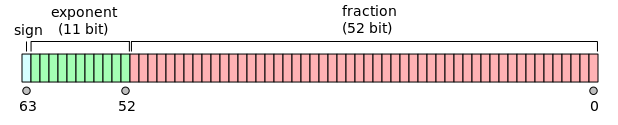 
$$\text{Zdroj: https://en.wikipedia.org/wiki/Double-precision_floating-point_format}.$$

Reprezentácia čísla $1$ v dvojnásobnej presnosti 

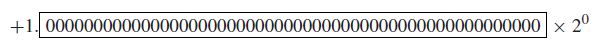

Najbližšie číslo s pohyblivou rádovou čiarkou väčšie ako je $1$ je číslo $1+2^{-52}$ 

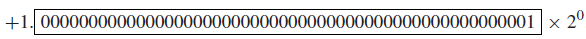 

Podľa IEEE štandardu existuje tiež binárna reprezentácia $INF$ pre výrazy typu $+\infty$ (napr. výsledok operácie $1/0$), $-INF$ pre výrazy typu $-\infty$ (napr. výsledok operácie $-1/0$) a $NAN$ (not a number) pre výrazy typu $0/0$, $\infty-\infty$, $0\times\pm(\infty)$ (napr. výsledok operácie $1/0-2/0$). Systém $\mathbb{F}$ je na väčšine počítačov rozšírený o tzv. **_subnormálne čísla_** - ide o nenulové nenormalizované čísla s najmenším možným exponentom $e=L$. Najmenšie kladné subnormálne číslo $UFL_s=\varepsilon_m\times UFL$, t. j. v jednoduchej presnosti $UFL_s\doteq1.4\times10^{-45}$ a v dvojnásobnej presnosti $UFL_s\doteq4.9\times10^{-324}$. 

In [3]:
# https://www.piday.org/million/ 
# uvazujme cislo pi 
# kolko cislic moze cislo s pohyblivou radovou ciarkou v pocitaci presne reprezentovat? 

pi=np.pi

double=np.array([pi],dtype='float64')
single=np.array([pi],dtype='float32')
print('double precision 64 bit pi = {:1.27f}'.format(double[0])) # 64-bit
print('single precision 32 bit pi = {:1.27f}'.format(single[0])) # 32-bit
print('first 27 digits of pi      = 3.141592653589793238462643383')

double precision 64 bit pi = 3.141592653589793115997963469
single precision 32 bit pi = 3.141592741012573242187500000
first 27 digits of pi      = 3.141592653589793238462643383


In [2]:
# jednoducha (strojova) presnost 
print(np.finfo(float).eps) 
# dvojnasobna (strojova) presnost 
print(np.finfo(np.float32).eps)

2.220446049250313e-16
1.1920929e-07


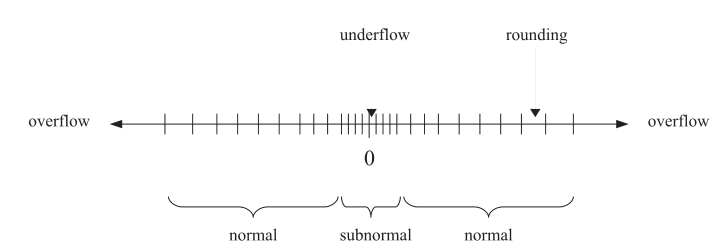 
$$\text{Zdroj: Gezerlis (2020).}$$

In [13]:
# Python a IEEE reprezentacia cisel 
print(np.finfo(np.float16))
print(np.finfo(np.float32))
print(np.finfo(float)) 
print(np.finfo(np.float64))

Machine parameters for float16
---------------------------------------------------------------
precision =   3   resolution = 1.00040e-03
machep =    -10   eps =        9.76562e-04
negep =     -11   epsneg =     4.88281e-04
minexp =    -14   tiny =       6.10352e-05
maxexp =     16   max =        6.55040e+04
nexp =        5   min =        -max
---------------------------------------------------------------

Machine parameters for float32
---------------------------------------------------------------
precision =   6   resolution = 1.0000000e-06
machep =    -23   eps =        1.1920929e-07
negep =     -24   epsneg =     5.9604645e-08
minexp =   -126   tiny =       1.1754944e-38
maxexp =    128   max =        3.4028235e+38
nexp =        8   min =        -max
---------------------------------------------------------------

Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   e

--- 

#### <font color=blue> Príklad 13 </font> 

Uvažujme (reálne) strojové číslo (v binárnom tvare - t. j. v dvokovej sústave, kde $\beta=2$) 

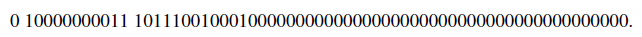 

Pre reálne číslo sa používa 64-bitová reprezentácia. Prvý bit je indikátor znamienka (kladné/záporné), označený $s$. Potom nasleduje 11-bitový exponent, označený $c$, nazývaný charakteristika, a postupnosť zvyšných 52 bitov reprezentuje mantisu $m$. Základ pre exponent je $\beta=2$. 

Pri dvojnásobnej presnosti máme $\varepsilon_m=2^{-52}\approx2.2\times10^{-16}$, čomu zodpovedá približne 16 platných desatinných miest. Exponent 11 binárnych číslic dáva rozsah $0$ až $2^{11}−1 = 2047$. Použitie iba kladných celých čísel pre exponent by však neumožnilo adekvátnu reprezentáciu čísel s malou absolútnou hodnotou. Aby sa zabezpečilo, že čísla s malou absolútnou hodnotou budú rovnako reprezentovateľné, $1023$ sa odpočíta od charakteristiky, takže rozsah exponentu $e=c-1023$ je v skutočnosti od $-1022$ do $1023$ tzn. $-1022\le e \le 1023$ (lebo $0<c<(11111111111)_2=2^{11}-1=2047$). 

Aby sa ušetril ukladací priestor a bola zabezpečená jedinečná reprezentácia každého čísla s pohyblivou rádovou čiarkou, je zavedená normalizácia (pozri vyššie). Pomocou tohto systému získame číslo s pohyblivou rádovou čiarkou v tvare 

$$(-1)^s2^{c-1023}m=(-1)^s2^{e}m,$$ 

čo je v podstate to isté ako 

$$\pm m\cdot\beta^e \text{ (viď začiatok tejto podkapitoly) pre } \beta=2$$ 

alebo tiež 

$$(-1)^s\left(1+\displaystyle\sum\limits_{i=1}^{52}d_i2^{-i+1}\right)\times2^e \quad \text{resp.} \quad (-1)^s(1.d_1d_2\ldots d_{52})_2\times2^e.$$

V zadanom čísle na začiatku príkladu, je bit najviac vľavo $0$, čo indikuje, že ide o kladné číslo lebo $(-1)^0=1>0$. Ďalších 11 bitov, konkrétne $10000000011$, je tzv. charakteristika čísla (resp. exponentu) a zodpovedá nasledujúcemu číslu v desiatkovej sústave: 

$$c=1 \times 2^{10} + 0 \times 2^9 + \ldots + 0 \times 2^2 + 1 \times 2^1 + 1 \times 2^0 = 1024 + 2 + 1 = 1027.$$

Preto exponenciálna časť uvažovaného čísla je $2^{1027-1023}=2^4$, tzn. exponent $e=4$. Ostávajúcich 52 bitov špecifikuje, ako vyzerá mantisa (pričom pre nenulové číslo $d_1=1$ sa neukladá), t. j. 

$$m=1\times\left(\frac{1}{2}\right)^1+1\times\left(\frac{1}{2}\right)^3+1\times\left(\frac{1}{2}\right)^4+1\times\left(\frac{1}{2}\right)^5+1\times\left(\frac{1}{2}\right)^8+1\times\left(\frac{1}{2}\right)^{12}.$$

Ako dôsledok predchádzajúcich úvah vieme povedať, že zadanému strojovému číslu vlastne odpovedá nasledovné číslo v desiatkovej sústave: 

$$(-1)^s2^{c-1023}m=(-1)^0\times2^{1027-1023}\left(1+\frac{1}{2}+\frac{1}{8}+\frac{1}{16}+\frac{1}{32}+\frac{1}{256}+\frac{1}{4096}\right)=27.56640625$$

---

--- 

#### <font color=blue> Príklad 14 </font>  

Číslo $9.4=(1001.\overline{0110})_2$ je reprezentované v tvare 

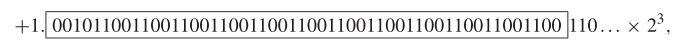 

pričom v rámčeku je vyznačených prvých $52$ bitov mantisy. Otázka znie, ako toto číslo, ktoré nemá konečný počet číslic (nepatrí do $\mathbb{F}$) reprezentovať pomocou konečnej postupnosti 52 bitov? Odpoveďou je zaokrúhľovanie uvedené vyššie resp. aproximácia najbližším číslom z $\mathbb{F}$ (napr. v dvojnásobnej presnosti). 

Podľa **_pravidla zaokrúhľovania k najbližšiemu_** (anglicky *rounding to nearest rule*), pri dvojnásobnej presnosti, ak je 53. bit napravo (od desatinnej čiarky) $0$, zaokrúhlime nadol (a všetko za 52. bitom vynecháme resp. "zahodíme"). Ak je 53. bit $1$, zaokrúhlime nahor (pridáme $1$ k 52. bitu), pokiaľ všetky známe bity napravo od $1$ nie sú 0 (nachádza sa tam aspoň jedna jednotka), v takom prípade sa $1$ pridá (pripočíta) k 52. bitu vtedy a len vtedy, ak je 52. bit rovný $1$. 

Pre číslo $9.4$ diskutované vyššie je 53. bit napravo (od desatinnej čiarky) rovný $1$ a za ním nasledujú ďalšie nenulové bity. Pravidlo zaokrúhľovania (k najbližšiemu) hovorí, že je potrebné zaokrúhliť nahor alebo pridať $1$ k 52. bitu. Preto je číslo s pohyblivou rádovou čiarkou, ktoré predstavuje $9.4$ nasledovné 

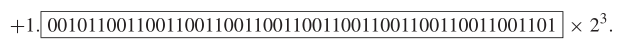 

V počítačovej aritmetike je reálne číslo nahradené postupnosťou bitov, ktoré zodpovedajú $fl(x)$ t. j. číslu s pohyblivou rádovou čiarkou (v dvojnásobnej presnosti) podľa IEEE so zaokrúhlením k najbližšiemu. Tzn., že $fl(9.4)$ je v binárnej reprezentácii práve 

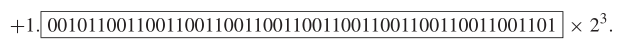 

K tejto reprezentácii sme dospeli tak, že sme sprava vynechali časť $\overline{.1100}\times2^{-52}\times2^3=\overline{.0110}\times2^{-51}\times2^3=.4\times2^{-48}$, obsahujúcu nekonečne veľa cifier a následne sme pridali (pripočítali) $2^{-52}\times2^3=2^{-49}$ v zaokrúhľovacom kroku. Tým pádom máme 

$$fl(9.4)=9.4+2^{-49}-0.4\times2^{-48}=9.4+(1-0.8)2^{-49}=9.4+0.2\times2^{-49}.$$

Inými slovami, počítač využívajúci dvojnásobnú presnosť a zaokrúhľovanie k najbližšiemu sa pri ukladaní čísla $9.4$ dopúšťa chyby rádovo $0.2\times2^{-49}$. Táto chyba $0.2\times2^{-49}$ sa nazýva **_zaokrúhľovacia chyba_** (*round-off error* - zapríčinená limitovanou strojovou presnosťou t. j. rozdiel medzi aproximáciou čísla použitého pri výpočte a jeho presnou (správnou) hodnotou). 

**Je dôležité uvedomiť si, že číslo s pohyblivou rádovou čiarkou predstavujúce $9.4$ sa nerovná $9.4$, hoci je k nemu veľmi blízko.** 

--- 

--- 

#### <font color=blue> Príklad 15 </font>  

Strojové sčítanie pozostáva zo zarovnania desatinných čiarok dvoch sčítavaných čísel, ich sčítania a následného uloženia výsledku opäť ako čísla s pohyblivou rádovou čiarkou. Samotné sčítanie možno vykonať s vyššou presnosťou (s viac ako 52 bitmi), pretože prebieha v registri určenom práve na tento účel. Po vykonaní sčítania musí byť výsledok zaokrúhlený späť na 52 bitov kvôli uloženiu vo formáte strojového čísla. 

Napr. pripočítanie čísla $1$ k číslu $2^{-53}$ sa realizuje nasledovne: 

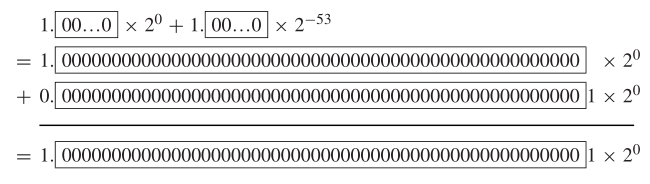 

Vzhľadom k zaokrúhľovaniu sa výsledok uloží ako $1.0\times2^0=1$. Preto $1+2^{-53}$ je rovné $1$ v dvojnásobnej presnosti v rámci IEEE aritmetiky. Všimnime si, že $2^{-53}$ je najväčšie číslo s pohyblivou rádovou čiarkou s touto vlastnosťou: čokoľvek väčšie pripočítané k $1$ by viedlo k súčtu väčšiemu ako $1$ podľa počítačovej aritmetiky.

--- 

--- 

#### <font color=blue> Príklad 16 </font>  

Nájdite binárnu strojovú reprezentáciu $fl(x)$ v dvojnásobnej presnosti a tiež zaokrúhľovaciu chybu pre $x=0.4$. 

<ins> Riešenie: </ins>

Keďže $(0.4)_{10}=(.\overline{0110})_2$, tak máme 

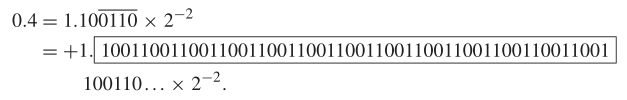 

Podľa zaokrúhľovacieho pravidla teda dostávame pre $fl(0.4)$ nasledujúce vyjadrenie 

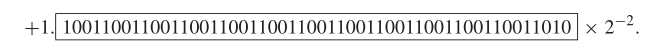 

Tu bola k 52. bitu pridaná $1$, čo spôsobilo zmenu aj 51. bitu v dôsledku binárneho sčítania. 

Môžeme si všimnúť, že sme vynechali $2^{-53}\times2^{-2}+.\overline{0110}\times2^{-54}\times2^{-2}$ a pridali (pripočítali) sme $2^{-52}\times2^{-2}$ v rámci zaokrúhľovania. Takto dostávame 

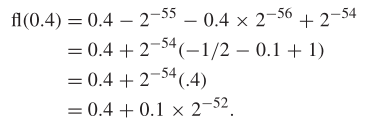 

Relatívna chyba zaokrúhľovania pre číslo $0.4$ je $0.1/0.4\times\varepsilon_m=1/4\times\varepsilon_m$ (v súlade s b) pri strojovej presnosti). 

--- 

--- 

#### <font color=blue> Príklad 17 </font> 

Skutočnosť, že $\varepsilon_{m} = 2^{−52}$ neznamená, že čísla menšie ako $\varepsilon_{m}$ sú v modeli IEEE zanedbateľné. Pokiaľ sú v modeli reprezentovateľné, výpočty s číslami tejto veľkosti sú rovnako presné, za predpokladu, že nie sú pripočítané alebo odčítané k číslam jednotkovej veľkosti. 

Je dôležité si uvedomiť, že **počítačová aritmetika môže v dôsledku skrátenia a zaokrúhľovania, ktoré vykonáva, niekedy poskytnúť prekvapivé výsledky**. Napríklad, ak počítač s dvojnásobnou presnosťou so zaokrúhľovaním IEEE k najbližšiemu (strojovému) číslu má uložiť číslo $9.4$, potom od neho odčítať číslo $9$ a následne ešte odčítať $0.4,$ výsledkom bude niečo iné ako nula! Udeje sa  nasledovné: Najprv sa $9.4$ uloží ako $9.4 + 0.2 \times 2^{−49}$ (viď Príklad 14). Keď sa odpočíta $9$ (všimnite si, že $9$ môže byť vyjadrená bez chyby), výsledok je $0.4 + 0.2 \times 2^{−49}$ . Teraz, keď požiadame počítač, aby odčítal $0.4$, výsledkom bude odčítanie (ako sme zistili v Príklade 16) strojového čísla $fl(0.4) = 0.4 + 0.1 \times 2^{−52}$ , čím dostaneme 

$$0.2 \times 2^{−49} − 0.1 \times 2^{−52} = 0.1 \times 2^{−52}\left(2^4 − 1\right) = 3 \times 2^{−53}$$ 

miesto nuly. Je to malé číslo, rádovo niečo ako $\varepsilon_m$, ale nie je to nula. Nasleduje ilustrácia výpočtu v Pythone. 

In [8]:
x = 9.4 
print(x) 
y = x - 9 
print(y) 
z = y - 0.4 
print(z) 
print(3*2**(-53))

9.4
0.40000000000000036
3.3306690738754696e-16
3.3306690738754696e-16


--- 

## Počítačová aritmetika 

Nech $x,y\in\mathbb{F}$ sú strojové čísla, ďalej nech $\odot$ označuje niektorú zo základných aritmetických operácií $+,-,\times,/$ a $flop$ je odpovedajúca operácia vykonaná počítačom v režime pohyblivej rádovej čiarky podľa IEEE štandardu. Potom $x\,flop\,y=fl(x\odot y)$. To znamená, že **výsledok aritmetickej operácie vykonanej v počítači je rovnaký, ako keď operáciu vykonáme presne a následne získaný výsledok vložíme do počítača**. 

---

#### Poznámka 4 

**Strojová aritmetika (resp. aritmetika s pohyblivou rádovou čiarkou) nie je vo všeobecnosti komutatívna!** (viď Príklad 0). Je to rozdiel oproti tomu, na čo sme zvyknutí pri "klasickom" násobení alebo sčítaní reálnych čísel.  

--- 

## Pretečenie, podtečenie

Pokiaľ je absolútna hodnota výsledku aritmetickej operácie väčšia 
než $OFL$, dochádza k tzv. **_pretečeniu_**. Na druhej strane, ak je absolútna hodnota nenulového výsledku 
menšia než $UFL$ (resp. $UFLs$ v počítačoch so subnormálnymi číslami), dochádza k tzv. **_podtečeniu_**. 
Keď dôjde počas behu programu k pretečeniu, systém vydá varovanie a výpočet preruší. V prípade 
podtečenia nie je situácia taká vážna: výsledok sa nahradí nulou a výpočet pokračuje bez 
prerušenia. Skúsený programátor však môže reakciu programu na pretečenie riadiť sám. 

In [5]:
# ilustracia tzv. pretecenia 
large = 2.**1021 
for i in range(4): 
    large *= 2 
    print(i, large)

0 4.49423283715579e+307
1 8.98846567431158e+307
2 inf
3 inf


Podľa očakávania sme dospeli k hodnote `inf`, keďže od hodnoty $2^{1024}\approx1.7976\times10^{308}$ vyššie, už nedokáže počítač ukladať výsledky v dvojnásobnej presnosti. Pre overenie slúži nasledujúci výpočet v Python-e. 

In [9]:
# overenie 
print(8.98846567431158e+307*1.999999999999999) 
print(8.98846567431158e+308*1.999999999999999) 

1.797693134862315e+308
inf


<font color=orange> Naprogramujte v Python-e výpočet, ktorý povedie k tzv. podtečeniu. </font> 

---

#### Poznámka 5 

* I jednoduché algoritmy, ako je Gaussova eliminácia alebo metódy na riešenie diferenciálnych rovníc, môžu zväčšiť mikroskopické chyby na makroskopickú veľkosť. Je dôležité uvedomovovať si tieto skutočnosti, vedieť ich rozpoznať, tzn. kedy hrozí, že výpočet bude nespoľahlivý v dôsledku zväčšovania malých chýb, ktoré spôsobujú počítače a vedieť, ako sa tomuto riziku vyhnúť alebo ho minimalizovať. 


* Pekný **interaktívny applet** určený na reprezentáciu decimálne zapísaných čísel podľa IEEE 754 štandardu je možné nájsť na [tejto stránke](https://babbage.cs.qc.cuny.edu/IEEE-754/). Ďalší interaktívny nástroj vhodný na experimentovanie je k dispozícii [tu](https://www.h-schmidt.net/FloatConverter/IEEE754.html). 

--- 

--- 

#### <font color=blue> Príklad 18 </font>  

Nájdite (binárnu) reprezentáciu výpočtu $\left(1+3\times2^{-53}\right)-1$ v dvojnásobnej presnosti v systéme s pohyblivou rádovou čiarkou. 

<ins> Riešenie: </ins> 

Samozrejme, v skutočnej (resp. teoretickej/symbolickej) aritmetike je výsledok výpočtu rovný $3\times2^{-53}$. Avšak aritmetika v systéme s pohyblivou rádovou čiarkou sa môže líšiť. Všimnime si, že $3\times2^{-53}=2^{-52}+2^{-53}$. Prvé sčítanie je 

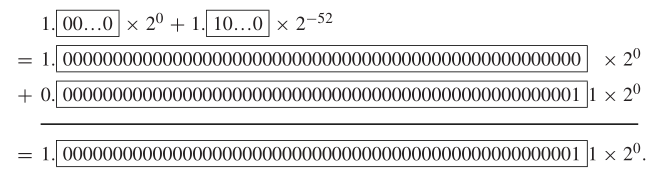 

Toto je už spomínaná výnimka pri zaokrúľovaní, keďže 52. bit v súčte je $1$, zaokrúhľujeme nahor, tzn. pripočítame $1$ k 52. bitu. Následne dostaneme 

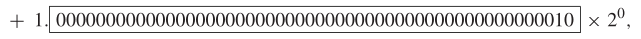 

čo je vlastne reprezentácia $1+2^{-51}$. Preto po odčítaní $1$, bude výsledok $2^{-51}$, čo je rovné $2\varepsilon_m=4\times2^{-53}$. Uvedomme si ešte raz rozdiel medzi počítačovou (strojovou) aritmetikou a exaktnou aritmetikou. 

In [12]:
# overenie v Pythone 
print((1+3*2**(-53))-1) 
print(2*np.finfo(float).eps) 
print(4*2**(-53))

4.440892098500626e-16
4.440892098500626e-16
4.440892098500626e-16


--- 

***
<a id=podm_stab></a>
 # <font color=brown> Podmienenosť úloh a stabilita algoritmov </font>

## Korektnosť úloh 

Matematickú úlohu je možné chápať ako zobrazenie $y=f(x)$, ktoré každému vstupnému údaju $x$ z množiny $D$ vstupných dát priradí výsledok z množiny $R$ výstupných dát. Hovoríme, že matematická úloha 

$$y=f(x), \qquad x\in D, \qquad y\in R,$$

je **_korektná_**, ak 

1. ku každému vstupu $x\in D$ existuje jediné riešenie $y\in R$, 

2. toto riešenie závisí spojite na vstupných dátach, tzn. keď $x\to a$, potom $f(x)\to f(a)$. 

Veľkou triedou nekorektných úloh sú nejednoznačne riešiteľné úlohy. Nekorektné úlohy sa nedajú rozumne riešiť, a preto sa nimi nebudeme zaoberať :-) 

## Podmienenosť úloh 

Úlohu budeme nazývať  **_dobre podmienenou_**, ak malá zmena vo vstupných dátach vyvolá malú zmenu v riešení (vo výstupných dátach). Nech $y+\Delta y$ resp. $y$ je riešenie úlohy odpovedajúce vstupným dátam $x+\Delta x$ resp. $x$, potom číslo 

\begin{equation*} \label{eq:condNumb} \tag{8} 
C_p=\dfrac{|\Delta y|/|y|}{|\Delta x|/|x|}=\dfrac{\text{relatívna chyba výstupu}}{\text{relatívna chyba vstupu}},
\end{equation*}

(kde miesto absolútnych hodnôt môžu byť vo všeobecnosti normy - pokiaľ sa jedná o vektory, matice či funkcie ...) nazývame **_číslo podmienenosti_** úlohy $y=f(x)$. Pokiaľ je $C_p$ malé číslo, tak úloha je dobre podmienená. Naopak, pre veľké $C_p$ je úloha zle podmienená. Miesto dobrej/zlej podmienenosti, hovoríme niekedy o malej/veľkej **_citlivosti vzhľadom k vstupným údajom_**. 

--- 

#### <font color=blue> Príklad 19 </font> 
 
Odhadnite číslo podmienenosti úlohy: stanoviť funkčnú hodnotu (diferencovateľnej) funkcie $y=f(x)$. 

<ins> Riešenie: </ins>

Zo vzťahu (2) plynie 

\begin{equation*} \label{eq:condNumbFuncVal} \tag{9} 
C_p\doteq\left|\dfrac{xf'(x)}{f(x)}\right|.
\end{equation*}

Konkrétne pre funkciu $f(x)=\mathrm{tg}\,x$ dostaneme $C_p\doteq |2x/\sin2x|$. Výpočet $\mathrm{tg}\,x$ je veľmi citlivý pre $x$ blízke celočíselnému násobku $\pi/2$. Napr. pre $x=1.57079$ je $C_p\doteq2.48\times10^5$. Výsledok je možné overiť aj priamym výpočtom podľa vzorca (8), pre $\Delta x=10^{-9}$ dostaneme opäť $C_p\doteq2.48\times10^5$. 


In [12]:
# x1 = np.pi/2
x0 = 1.57079

# vypocet C_p podla vzorca (9)
x = sym.Symbol('x')
tan_deriv = sym.diff(sym.tan(x), x) 
tan_derivative = sym.lambdify(x, tan_deriv) 
print(np.abs(x0*tan_derivative(x0)/sym.tan(x0)))

print(np.abs(2*x0/np.sin(2*x0)))

# vypocet C_p podla vztahu (8) 
# print(x1-x0)
dx = 10**(-9) 
print((np.abs(np.tan(x0+dx)-np.tan(x0))/np.abs(np.tan(x0))) / (np.abs(dx)/np.abs(x0)))

248275.789825047
248275.78982504655
248315.05853073203


--- 

Číslo podmienenosti definované podľa vzťahu (8) sa niekedy označuje ako **_relatívne číslo podmienenosti_**. Väčšinou je to vhodná miera citlivosti, no keď je $x$ alebo $y$ rovné nule, nedá sa použiť. V takých prípadoch je možné vyskúšať tzv. **_absolútne číslo podmienenosti_** definované vzťahom $\bar{C}_p=\dfrac{|\Delta y|}{|\Delta x|}$. 

--- 

#### <font color=blue> Príklad 20 </font> 
 
Posúdime citlivosť výpočtu funkčnej hodnoty $f(x)=x^2-1$. Pre korene $x_{1,2}=\pm1$ nie je relatívne číslo podmienenosti definované. K rovnakému záveru prídeme aj podľa vzťahu (9) t. j. $C_p\doteq\left|2x^2/(x^2-1)\right|$

Absolútne číslo podmienenosti je

$$\bar{C}_p=\left|\dfrac{f(x+\Delta x)-f(x)}{\Delta x}\right|\doteq |f'(x)|,$$ 

a teda pre $f(x)=x^2-1$ máme $\bar{C}_p\doteq|2x|$, špeciálne pre $x=\pm1$ dostaneme $\bar{C}_p\doteq2$. 

---  


## Stabilita algoritmu 

Pri realizácii numerickej metody na počítači vznikajú zaokrúhľovacie 
chyby, najprv vo vstupných dátach a potom v priebehu výpočtu pri vykonávaní aritmetických 
operácií. Ak sa chceme pri výpčtoch vyvarovať nezmyselných výsledkov, musíme si vyberať tzv. 
**_stabilné algoritmy_**, ktoré sú málo citlivé vzhľadom na šírenie zaokrúhľovacích chýb. Aby bol 
algoritmus stabilný, musí byť 

1. **_dobre podmienený_** - málo citlivý na poruchy vo vstupných dátach, 

2. **_numericky stabilný_** - málo citlivý na vplyv zaokrúhľovacích chýb vznikajúcich v priebehu výpočtu. 

--- 

#### <font color=blue> Príklad 21 </font> 
 
Kvadratická rovnica $x^2-2bx+c=0$ má pre $b^2>c$ dva rôzne reálne korene 

\begin{equation*} \label{alg:korenKvadRov} \tag{$A_1$} 
x_{1,2}=b\pm d,
\end{equation*}

kde $d=\sqrt{b^2-c}$. Ak $|b|\doteq |d|$, tak sa pri výpočte jedného z koreňov budú odčítavať dve približne rovnako veľké čísla s rovnakým znamienkom, čo vedie, ako už vieme, k vzniku veľkej relatívnej chyby (vzťah (3) a Príklad 9). Výpočet podľa algoritmu \eqref{alg:korenKvadRov} teda nie je vo všeobecnosti stabilný. Existuje však jednoduchá pomoc: keďže $x_1x_2=c$, môžeme postupovať nasledovne: 

\begin{equation*} \label{alg:korenKvadRov2} \tag{$A_2$} 
x_1=
\begin{cases} 
      b+d, & \text{ ak } b\ge0, \\
      b-d, & \text{ ak } b < 0,
   \end{cases}
\qquad 
x_2=\dfrac{c}{x_1}
\end{equation*}

Algoritmus \eqref{alg:korenKvadRov2} odstraňuje nedostatok algoritmu \eqref{alg:korenKvadRov}, teda je stabilný. 

---  

--- 

#### <font color=blue> Príklad 22 </font> 
 
Počítajme integrál 

$$I_n=\displaystyle\int_{0}^{1}x^ne^{x-1}\,\mathrm{d}x, \qquad \text{ pre } n\in\{1,2,\ldots\}$$

Integráciou per partes dostaneme 

$$I_n=\displaystyle\int_{0}^{1}x^ne^{x-1}\,\mathrm{d}x=\left[x^ne^{x-1}\right]_{0}^1-\displaystyle\int_{0}^{1}nx^{n-1}e^{x-1}\,\mathrm{d}x,$$ 

čo môžeme vyjadriť v tvare 

\begin{equation*} \label{eq:intPerParRek} \tag{$F$} 
I_n=1-nI_{n-1}.
\end{equation*}

Keďže $I_1=1/e$, tak môžeme pri výpočte $I_n$ postupovať podľa algoritmu 

\begin{equation*} \label{alg:intPerPar} \tag{$A_3$} 
I_1=1/e, \qquad I_n=1-nI_{n-1}, \qquad n=2,3,\ldots
\end{equation*}

Výpočet realizovaný na počítači v jednoduchej presnosti (t. j. cca $7$ platných cifier) a pre $n=12$ dá výsledok $I_{12}\doteq-4.31$. To je ale neprijateľný výsledok lebo pre kladný integrand nemôžeme dostať zápornú hodnotu integrálu! Tento jav je spôsobený tým, že pri výpočte $I_n$ sa chyba obsiahnutá v $I_{n-1}$ násobí $n$-krát, takže celková chyba rastie podobne ako $n!$. 

Algoritmus \eqref{alg:intPerPar} je teda nestabilný. Vzniká otázka, či je možné vypočítať $I_{12}$ aplikovaním rekurentnej formuly \eqref{eq:intPerParRek} tak, aby výsledok mal všetkých sedem cifier platných. Možné to je ale musíme použiť iný algoritmus. Ak prepíšeme \eqref{eq:intPerParRek} na tvar 

$$I_{n-1}=\dfrac{1-I_n}{n},$$

tak sa bude chyba vstupujúca do každého kroku deliť $n$. Z odhadu 

$$0\le I_n=\displaystyle\int_{0}^{1}x^ne^{x-1}\,\mathrm{d}x\le\displaystyle\int_{0}^{1}x^n\,\mathrm{d}x=\dfrac{1}{n+1}$$

vyplýva, že $I_n\to0$ pre $n\to\infty$. Pri výpočte budeme preto postupovať podľa nasledujúceho algoritmu 

\begin{equation*} \label{alg:intPerPar2} \tag{$A_4$} 
I_n=0, \qquad I_{n-1}=\dfrac{1-I_n}{n}, \qquad n=N,N-1,\ldots,
\end{equation*}

kde $N$ je dostatočne veľké (prirodzené) číslo. Ak zvolíme napr. $N=20$, tak dostaneme $I_{12}\doteq7.735223\times10^{-2}$, čo je hodnota, ktorá má sedem platných cifier. 

Ak výpočet realizujeme v dvojnásobnej presnosti (cca $16$ platných cifier), dostaneme obdobné výsledky. Rozdiel je však v tom, že výpočet algoritmom \eqref{alg:intPerPar} sa "pokazí" až pre väčšie hodnoty $n$; pre $n=20$ už výjde nezmyselná hodnota $I_{20}\doteq-30.19$. Stabilným algoritmom \eqref{alg:intPerPar2} pre $N=35$ dostaneme $I_{20}\doteq4.772275579620910\times10^{-2}$ s $16$ platnými ciframi. 


In [12]:
# double precision - A_3
def unstable_integral_calculation(n): 
    if n==1: 
        return 1/np.exp(1) 
    result = 1-n*unstable_integral_calculation(n-1) 
    return result

print(unstable_integral_calculation(12))
print(unstable_integral_calculation(20))

0.07177324769463667
-30.19239488558378


In [13]:
# double precision - A_4
def stable_integral_calculation(n, N): 
    if n==N: 
        return 0
    result = (1-stable_integral_calculation(n+1, N))/n 
    return result
    
print(stable_integral_calculation(12, 20))
print(stable_integral_calculation(20, 35))

0.07735222884700439
0.0477227557962091


---  

***
<a id=zlozitost></a>
 # <font color=brown> Algoritmická (výpočtová/časová) zložitosť </font> 

**Analýza výpočtovej zložitosti algoritmu poskytuje mieru efektívnosti algoritmu a používa sa na porovnanie a hodnotenie výkonnosti algoritmov.** Rozoberieme len niekoľko prvkov dôležitých pre charakterizáciu vlastností algoritmov prezentovaných v tomto kurze (v praxi je samozrejme dôležitá aj špecifická implementácia algoritmu). 

Definícia veľkosti (riešeného) problému resp. úlohy je kľúčová, pretože výpočtové úsilie algoritmu by malo byť jej funkciou. Vo všeobecnosti sa veľkosť vyjadruje ako približne počet prvkov, ktoré musí algoritmus spracovať (množstvo údajov). V prípade výpočtu riešenia sústavy lineárnych rovníc $\mathbf{A}\mathbf{x} = \mathbf{b}$ je veľkosť úlohy daná rádom $n$ matice $\mathbf{A}$. Pri násobení dvoch matíc je veľkosť úlohy definovaná rozmerom týchto dvoch matíc. 

Detailné porovnanie algoritmov je vo všeobecnosti náročné na realizáciu a väčšinou nie je príliš užitočné. **Najdôležitejším kritériom na porovnanie algoritmov je čas vykonania algoritmu.** Aby bola miera praktická, musí sa dať ľahko vypočítať a musí byť nezávislá od výpočtovej platformy. Preto sa čas vykonávania meria počtom základných operácií (napr. sčítanie, odčítanie, násobenie, delenie, porovnanie, ...). **_Zložitosť algoritmu_** je teda definovaná ako počet elementárnych operácií na vyriešenie problému veľkosti $n$. 

Uvažujme o algoritme, ktorý postupne hľadá konkrétnu položku v zozname dĺžky $n$. Jeho výpočtový čas je potom $C(n)\le k_1n + k_2$, kde $k_1 \ge 0$ a $k_2 \ge 0$ sú dve konštanty nezávislé od $n$, charakterizujúce konkrétnu implementáciu. Vo všeobecnosti sa uvažuje najhorší (krajný) prípad $C(n) = k_1n + k_2$. Zápis $k_1n + k_2$ v zhruba vyjadruje, že algoritmus musí prejsť približne celý zoznam dĺžky $n$ (alebo nejakú jeho časť resp. násobok, čo vyjadruje koeficient $k_1$) plus nejaké prípadné kroky naviac, čo je zase vyjadrené konštantou $k_2$ a porovnať hodnoty uložené v poli s hľadanou hodnotou, teda v najhoršom prípade vykoná algoritmus $k_1n + k_2$ porovnaní. **Ďalším spôsobom je uvažovať o priemernom počte operácií, ktorý sa vo všeobecnosti musí vyhodnotiť simuláciou.** Niektoré algoritmy, ktoré sa v najhoršom prípade správajú veľmi zle, fungujú v priemere efektívne. Príkladom je simplexný algoritmus na riešenie úloh lineárneho programovania. 

Ako už bolo spomenuté, nechceme podrobne merať zložitosť. Vo všeobecnosti, a najmä pri maticových výpočtoch, počítame len počet elementárnych operácií pozostávajúcich zo sčítania, odčítania, násobenia a delenia. Tieto operácie sa nazývajú **_flop_**  (operácia s pohyblivou rádovou/desatinnou čiarkou). Do úvahy sa berie iba poradie počítacej funkcie. Pre ilustráciu uvažujme dva algoritmy $A_1$ a $A_2$, v ktorých funkcia počítajúca elementárne operácie je $C_{A_1}(n) = \frac{1}{2}n^2$ pre prvý algoritmus a $C_{A_2}(n) = 5n$ pre druhý algoritmus. 

Na nasledujúcom obrázku zodpovedajú trojuholníky algoritmu $A_1$ a krúžky algoritmu $A_2$. 

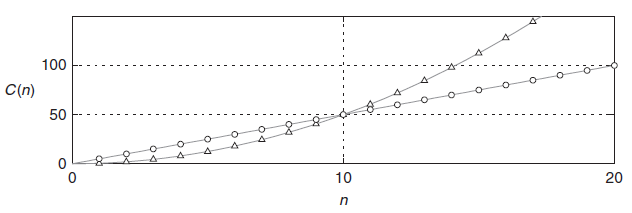 
$$\text{Zdroj: Gilli et al. (2019).}$$

Všimnime si, že pre $n>10$, je algoritmus $A_2$ rýchlejší ako $A_1$. Keďže výpočtový čas sa stáva kritickým pre rastúce hodnoty $n$, je to práve _rád_ počítacej funkcie, ktorý určuje zložitosť algoritmu. **_Rád_** funkcie je formalizovaný pomocou značenia $O(.)$, pričom **definujeme: funkcia $g(n)$ je rádu $O\left(f(n)\right)$, ak existujú konštanty $c_0$, $n_0$ také, že $g(n)<c_0f(n)$ pre všetky $n>n_0$**. Teda (výpočtová) zložitosť algoritmu $A_1$ je $O\left(n^2\right)$, naproti tomu algoritmus $A_2$ má zložitosť $O(n)$. Ďalej napr. zložitosť algoritmu s počítacou funkciou $C(n)=\frac{1}{3}n^3+n^2+\frac{2}{3}n$, vyjadrujúcou počet elementárny operácií, je $O(n^3)$. 

Z hľadiska rádu funkcie, vyjadrujúcej počet elementárnych operácií, delíme algoritmy do dvoch základných skupín: 

* **Polynomiálne algoritmy** - počet elementárnych operácií algoritmu je možné vyjadriť polynomickou funkciou veľkosti vstupu resp. veľkosti úlohy; 

* **Nepolynomiálne algoritmy**. 

Algoritmy z polynomiálnej triedy sa považujú za efektívne. 

**Výkon počítačov sa meria vo flopoch za sekundu.** Osobné počítače sa vyvinuli z niekoľkých kflops ($10^3$ flopov) na začiatku 80. rokov na niekoľko Gflop ($10^9$ flopov) na konci prvej dekády roku 2000. Veľkosť dostupnej rýchlej pamäte vzrástla rovnakým faktorom (rádovo podobne). 

Uvedomme si však, že rýchlejšie počítače neodstránia nepolynomické algoritmy z triedy neefektívnych algoritmov. Aby sme to ilustrovali, uvažujme napríklad o algoritme so zložitosťou $2^n$ a predpokladajme, že $N$ je veľkosť najväčšej inštancie problému, ktorú je možné vyriešiť za prijateľný čas. Zvýšenie rýchlosti výpočtu o faktor $1024$ zväčší veľkosť problému vypočítaného v rovnakom čase na $N+10$. 

Každá elementárna operácia (sčítanie, odčítanie, násobenie, delenie) sa ráta ako jeden flop. Majme dané vektory $\mathbf{x},\mathbf{y}\in\mathbf{R}^n,z\in\mathbf{R}^m$ a matice $\mathbf{A}\in\mathbb{R}^{m\times r},\mathbf{B}\in\mathbb{R}^{r\times n}$, potom platí: 

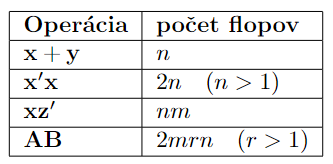 


V neposlednom rade je dôležitá tiež **_pamäťová zložitosť_** algoritmov alebo počítačových programov. Vyjadrujeme ju ako počet premenných, resp. pamäťových miest, ktoré algoritmus pri výpočte so zvolenými vstupnými údajmi potrebuje. Pamäťová zložitosť algoritmu $A$ je teda opäť istou funkciou $m_A$, ktorá vstupným údajom veľkosti $n$ priradzuje potrebný počet pamäťových miest $m_A(n)$, ktoré bude algoritmus $A$ pri výpočte s týmito údajmi využívať. 

<font color=purple> EXTRA: Využitím vhodných poznatkov z témy 1 spolu s Python-om, vysvetlite otázky položené v závere úvodného Príkladu 0 - o nekomutatívnom sčítaní. Po dôkladnom zdôvodnení (vrátane výpočtov/ukážok v Python-e) môžete získať jeden bonusový bod. </font> 

***
<a id=zdroje></a>
 # <font color=brown> Použité zdroje</font> 

* Ackleh, A.S., Allen, E.J., Kearfott, R.B., & Seshaiyer, P. (2009). Classical and Modern Numerical Analysis: Theory, Methods and Practice. Chapman and Hall/CRC. 


* Burden, R. L., & Faires, J. D. (2011). Numerical analysis. Brooks/Cole, Cengage Learning. 


* Čermák, L. (2020). Numerické metody. Ústav matematiky FSI VUT v Brně. 


* Fajmon, B., Hlavičková, I., Novák, M., Vítovec, J. (2014). Numerická matematika a pravděpodobnost. Ústav matematiky FEKT VUT v Brně. 


* Gezerlis, A. (2020). Numerical methods in physics with Python. Cambridge University Press. 


* Gilli, M., Maringer, D., Schumann, E. (2019). Numerical Methods and Optimization in Finance. Elsevier/Academic Press. 


* Kiusalaas, J. (2013). Numerical Methods in Engineering with Python 3. Cambridge University Press, USA.


* Kincaid, D., & Cheney, E. W. (2002). Numerical analysis: Mathematics of scientific computing. Pacific Grove, CA: Brooks/Cole.


* Kiseľák, J. (2020). Základy numerických metód. ÚMV PF UPJŠ. 


* Kong, Q., Siauw, T., Bayen, A. (2020). [Python Programming and Numerical Methods: A Guide for Engineers and Scientists](https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html). Academic Press. 


* Oršanský, P., Ftorek B. (2021). Štatistické a numerické metódy. EDIS - UNIZA.


* Růžičková, I. & Hlavička, R. (2020). Numerické metody. Ústav matematiky FSI VUT v Brně. 


* Sauer, T. (2011). Numerical Analysis. Addison-Wesley Publishing Company, USA. 


* Sullivan, E. (2020). Numerical Methods: An Inquiry-Based Approach With Python. Faculty Publications. 